Importando bibliotecas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Abrir dataset no kaggle
import opendatasets as opendatasets

Importando o dataset

In [6]:
opendatasets.download("https://www.kaggle.com/dhanushnarayananr/credit-card-fraud")
df = pd.read_csv("credit-card-fraud/card_transdata.csv")

Skipping, found downloaded files in "./credit-card-fraud" (use force=True to force download)


Visualizando inicialmente o dataset

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Verificando a proporção de transações fraudulentas
fraude_count = df[df["fraud"] == 1]["fraud"].count()
n_fraude_count = df[df["fraud"] == 0]["fraud"].count()
print("Numero de transacoes fraudulentas:", fraude_count)
print("Numero de transacoes nao fraudulentas", n_fraude_count)
print("Percentual de fraudes:", fraude_count / (fraude_count + n_fraude_count) * 100)

Numero de transacoes fraudulentas: 87403
Numero de transacoes nao fraudulentas 912597
Percentual de fraudes: 8.7403


<BarContainer object of 1 artists>

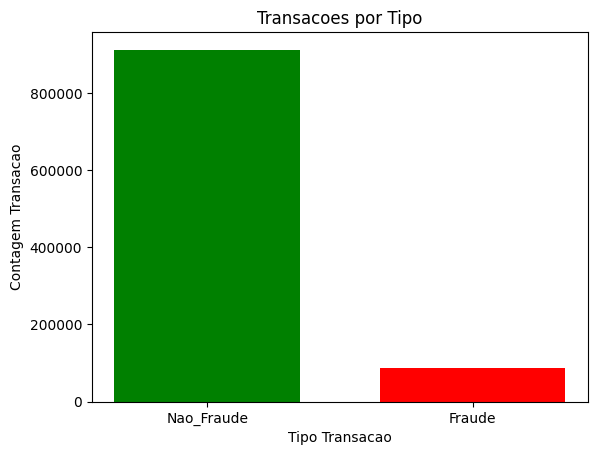

In [9]:
# Visualização Gráfica
categories = ["Nao_Fraude", "Fraude"]
xpos = np.array([0, 1])
plt.xticks(xpos, categories)
plt.xlabel("Tipo Transacao")
plt.ylabel("Contagem Transacao")
plt.title("Transacoes por Tipo")
plt.bar(xpos[0], n_fraude_count, width= 0.7, color = "g")
plt.bar(xpos[1], fraude_count, width = 0.7, color="r")

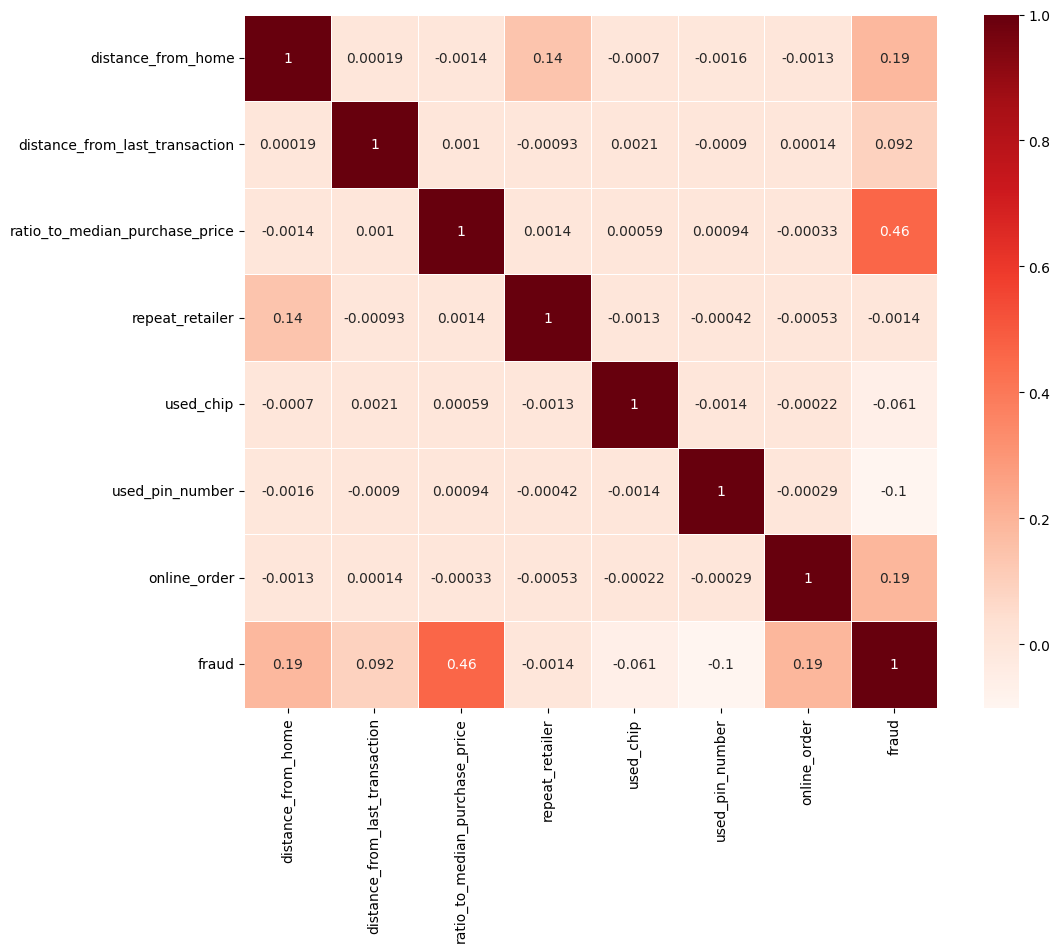

In [10]:
# Matriz de Correlação

correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,annot=True,square=True, linewidths=.5,cmap=plt.cm.Reds)
plt.show()

In [11]:
# Preparando a Base  - Separando as variáveis X e Y

X = df.iloc[:,0:7]
y = df.iloc[:,7]

print(f"Tamanho de X: {X.shape}")
print(f"Tamanho de y: {y.shape}")

Tamanho de X: (1000000, 7)
Tamanho de y: (1000000,)


In [12]:
# Coletar os nomes das variáveis X

features = list(df.drop(columns=['fraud']).columns)

In [13]:
# Quebrando o dataset em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')
print('Tamanho de y_train: ', y_train.shape, '\n')
print('Tamanho de y_test: ', y_test.shape, '\n')

Tamanho de X_train:  (750000, 7) 

Tamanho de X_test:  (250000, 7) 

Tamanho de y_train:  (750000,) 

Tamanho de y_test:  (250000,) 



In [30]:
# Instanciando o modelo de regressão logística

clf = LogisticRegression(n_jobs=-1, random_state=123, max_iter=1000)

In [32]:
# Fit do modelo 
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=123)

Obtendo os coeficientes do modelo 

In [33]:
# Coeficientes do modelo
for feature, coef in zip(X.columns, clf.coef_[0].tolist()):
    print(f"{feature}: {round(coef, 3)}")

distance_from_home: 0.015
distance_from_last_transaction: 0.025
ratio_to_median_purchase_price: 0.852
repeat_retailer: -0.623
used_chip: -1.042
used_pin_number: -13.259
online_order: 6.515


In [34]:
# Constante do modelo
print(f"Constante: {round(clf.intercept_[0], 3)}")

Constante: -10.193


In [35]:
# Verificando a acurácia do modelo
y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)

print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.96

 ---------------------------

Acurácia de Teste: 0.96


In [19]:
# Random Forest

rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [20]:
# Predict na base de teste
y_pred_rf = rnd_clf.predict(X_test)

In [21]:
# Matriz de classificação
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    228123
         1.0       1.00      0.86      0.93     21877

    accuracy                           0.99    250000
   macro avg       0.99      0.93      0.96    250000
weighted avg       0.99      0.99      0.99    250000



In [22]:
# Importância das variáveis X
for name, score in zip(features, rnd_clf.feature_importances_):
    print(name, score)

distance_from_home 0.16351338226435844
distance_from_last_transaction 0.055275851683769854
ratio_to_median_purchase_price 0.5477625042669116
repeat_retailer 0.005141729175046737
used_chip 0.042555553239994715
used_pin_number 0.042209296219305
online_order 0.14354168315061366


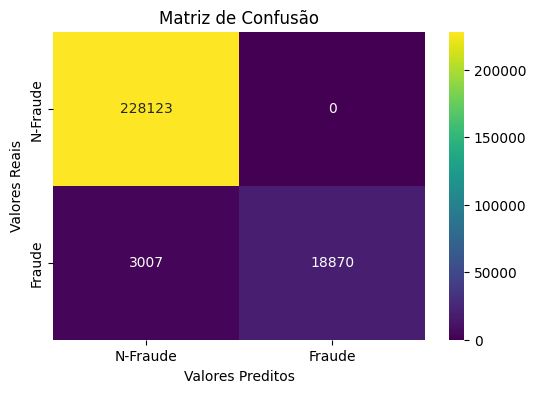

In [23]:
# Matriz de Cassificação
LABELS = ['N-Fraude', 'Fraude']
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap= "viridis", fmt="d")
plt.title("Matriz de Confusão")
plt.ylabel('Valores Reais')
plt.xlabel('Valores Preditos')
plt.show()

In [24]:
# Acurácia

print("Acurácia = ", (228123 + 18870)/ (228123 + 18870 + 3007))

Acurácia =  0.987972
